In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vu-dmt-assigment-2-2023/submission_sample.csv
/kaggle/input/vu-dmt-assigment-2-2023/test_set_VU_DM.csv
/kaggle/input/vu-dmt-assigment-2-2023/training_set_VU_DM.csv


In [3]:
df_original = pd.read_csv('/kaggle/input/vu-dmt-assigment-2-2023/training_set_VU_DM.csv')
df = df_original.sample(n = 10000)
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
1535008,103007,2013-03-04 21:05:17,18,129,NaN,NaN,129,89422,3,3.5,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,NaN,0
3353875,225263,2012-11-30 10:09:41,5,219,NaN,NaN,219,130594,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,33.0,0,NaN,0
4210938,282562,2013-02-23 09:58:29,5,219,NaN,NaN,219,45803,2,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3894523,261401,2013-03-05 21:01:18,12,99,NaN,NaN,215,67680,4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
220589,14814,2013-01-11 21:20:25,5,219,NaN,NaN,219,78549,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [4]:
df.isnull().sum(axis = 0)

srch_id                           0
date_time                         0
site_id                           0
visitor_location_country_id       0
visitor_hist_starrating        9496
visitor_hist_adr_usd           9493
prop_country_id                   0
prop_id                           0
prop_starrating                   0
prop_review_score                14
prop_brand_bool                   0
prop_location_score1              0
prop_location_score2           2229
prop_log_historical_price         0
position                          0
price_usd                         0
promotion_flag                    0
srch_destination_id               0
srch_length_of_stay               0
srch_booking_window               0
srch_adults_count                 0
srch_children_count               0
srch_room_count                   0
srch_saturday_night_bool          0
srch_query_affinity_score      9370
orig_destination_distance      3199
random_bool                       0
comp1_rate                  

In [5]:
df.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,10000.000000,10000.000000,10000.000000,504.000000,507.000000,10000.000000,10000.000000,10000.000000,9986.000000,10000.000000,...,206.000000,632.000000,719.000000,274.000000,3798.000000,3954.000000,1253.000000,10000.000000,282.000000,10000.000000
mean,166294.830300,10.077700,174.714800,3.405952,181.754872,173.303300,70552.562100,3.184500,3.769477,0.627700,...,16.131068,0.150316,0.051460,18.208029,-0.067667,0.012645,14.715084,0.045900,425.369504,0.028200
std,95871.166965,7.710681,65.991579,0.681917,113.436714,68.448343,40581.829396,1.040273,1.047176,0.483442,...,24.258713,0.583340,0.310216,36.829234,0.476360,0.216548,14.276404,0.209279,541.832441,0.165552
min,49.000000,1.000000,1.000000,1.750000,18.210000,2.000000,65.000000,0.000000,0.000000,0.000000,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,0.000000,32.690000,0.000000
25%,83152.000000,5.000000,100.000000,3.000000,112.165000,100.000000,35925.500000,3.000000,3.500000,0.000000,...,5.000000,0.000000,0.000000,7.000000,0.000000,0.000000,7.000000,0.000000,134.395000,0.000000
50%,164801.500000,5.000000,219.000000,3.455000,160.330000,219.000000,69805.000000,3.000000,4.000000,1.000000,...,11.000000,0.000000,0.000000,11.000000,0.000000,0.000000,11.000000,0.000000,236.770000,0.000000
75%,249465.750000,14.000000,219.000000,3.980000,219.375000,219.000000,105745.000000,4.000000,4.500000,1.000000,...,19.000000,1.000000,0.000000,20.000000,0.000000,0.000000,18.000000,0.000000,509.975000,0.000000
max,332774.000000,34.000000,229.000000,5.000000,1248.550000,230.000000,140809.000000,5.000000,5.000000,1.000000,...,244.000000,1.000000,1.000000,537.000000,1.000000,1.000000,204.000000,1.000000,5549.840000,1.000000


Text(0, 0.5, 'Price')

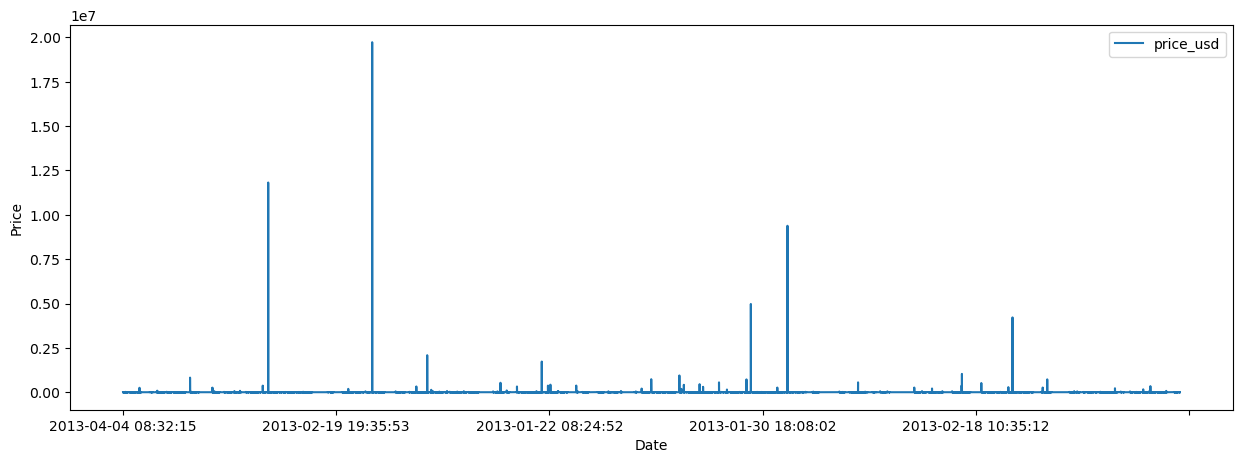

In [6]:
df_original.plot(x='date_time',y='price_usd',figsize=(15,5))
plt.xlabel('Date')
plt.ylabel('Price')
# plt.title("Time Series Graph Of Price Of Room Based on Date-Time")